# Fire Incidents

### Looking at which neighborhoods had the least number of fire incidents helps show which areas might be safer when it comes to fire risk. On the other hand, neighborhoods with a lot of fire incidents could have things like older buildings, safety issues, or just more people living there. This kind of data can help the city know where to focus on fire prevention and safety improvements.

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
fire = pd.read_csv('fire_incidents.csv')  # change filename if needed

# Inspect data structure
# fire.head()
# fire.info()

# Keep relevant columns
fire_cols = ['neighborhood', 'incident_type', 'alarm_time', 'address', 'type_description']
fire = fire[fire_cols]

# Drop missing neighborhoods
fire = fire.dropna(subset=['neighborhood'])

# Convert datetime column
fire['alarm_time'] = pd.to_datetime(fire['alarm_time'], errors='coerce')
fire['year'] = fire['alarm_time'].dt.year

In [7]:
# Group by neighborhood and count incidents
fire_counts = fire['neighborhood'].value_counts().reset_index()
fire_counts.columns = ['Neighborhood', 'Fire Incidents']

# Normalize by population if needed (with merge)
# pop_df = pd.read_csv('neighborhood_population.csv')
# fire_counts = fire_counts.merge(pop_df, on='Neighborhood')
# fire_counts['Incidents per 1000'] = fire_counts['Fire Incidents'] / fire_counts['Population'] * 1000

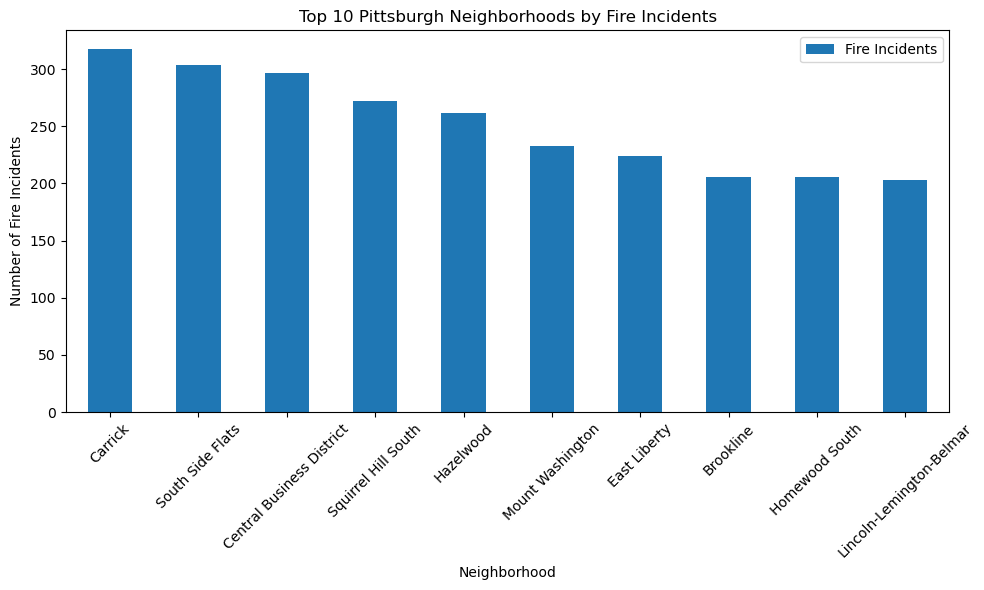

In [9]:
# Top 10 neighborhoods with most fire incidents
fire_counts.head(10).plot(kind='bar', x='Neighborhood', y='Fire Incidents',
                          title='Top 10 Pittsburgh Neighborhoods by Fire Incidents',
                          figsize=(10,6))
plt.ylabel('Number of Fire Incidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

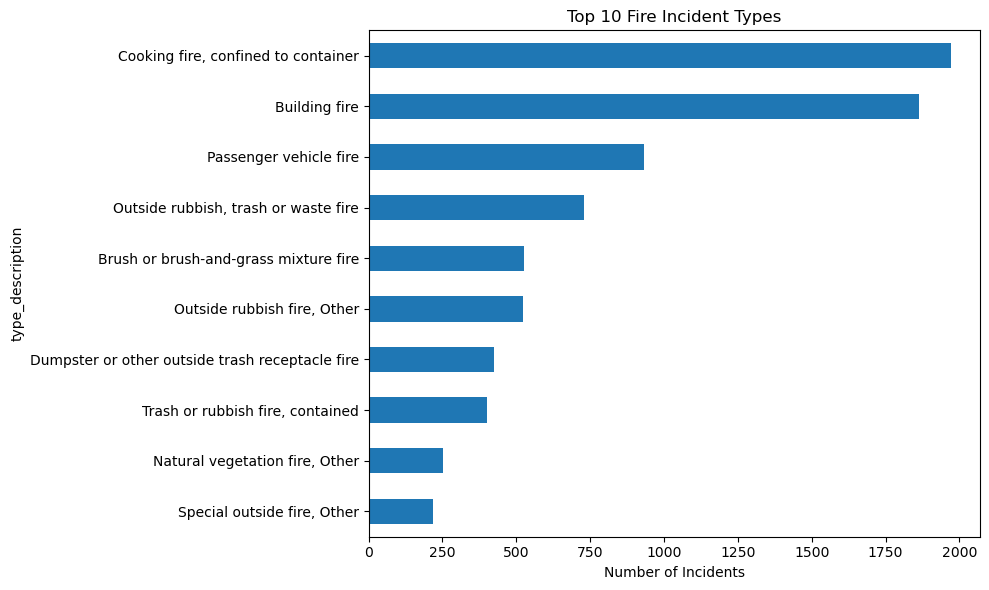

In [10]:
incident_types = fire['type_description'].value_counts().head(10)
incident_types.plot(kind='barh', title='Top 10 Fire Incident Types', figsize=(10, 6))
plt.xlabel('Number of Incidents')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

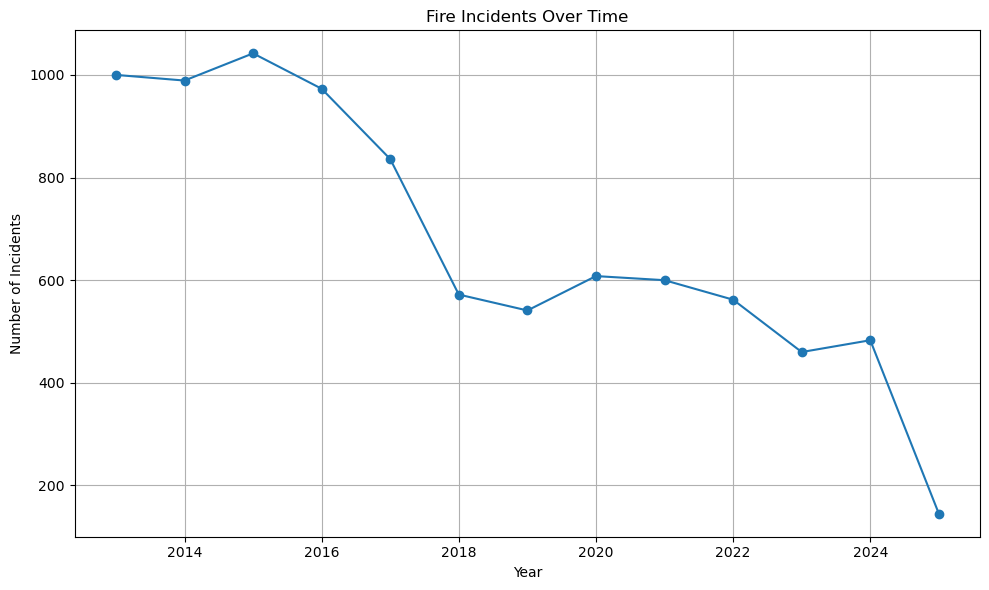

In [11]:
# Remove the comma from year assignment (bug fix)
fire['year'] = fire['alarm_time'].dt.year

# Group by year and count
yearly_counts = fire['year'].value_counts().sort_index()

# Plot
yearly_counts.plot(kind='line', marker='o', title='Fire Incidents Over Time', figsize=(10, 6))
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.grid(True)
plt.tight_layout()
plt.show()

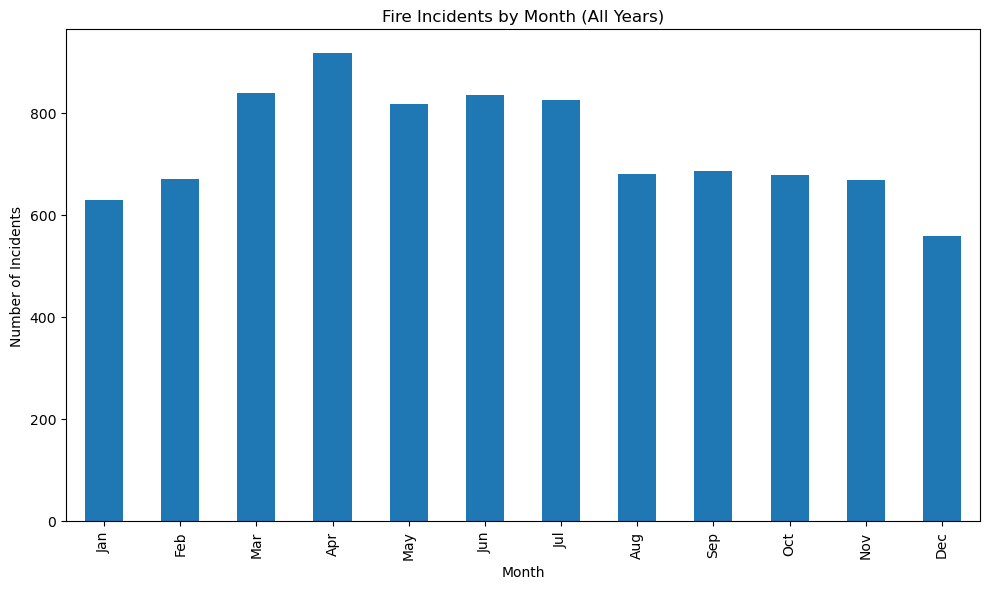

In [12]:
fire['month'] = fire['alarm_time'].dt.month

monthly_counts = fire['month'].value_counts().sort_index()
monthly_counts.index = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                        'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

monthly_counts.plot(kind='bar', title='Fire Incidents by Month (All Years)', figsize=(10, 6))
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.tight_layout()
plt.show()

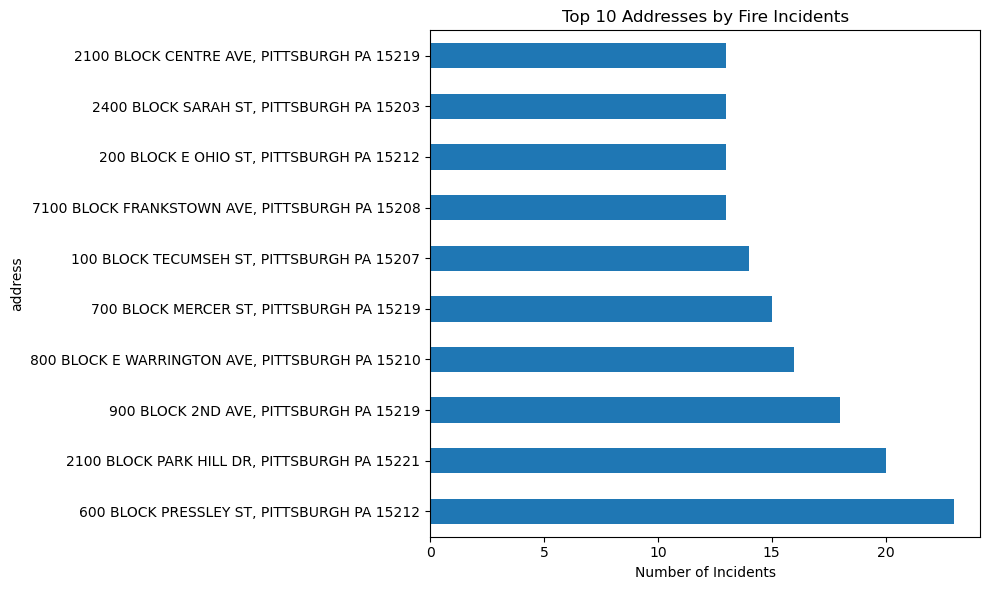

In [13]:
top_streets = fire['address'].value_counts().head(10)
top_streets.plot(kind='barh', title='Top 10 Addresses by Fire Incidents', figsize=(10, 6))
plt.xlabel('Number of Incidents')
plt.tight_layout()
plt.show()

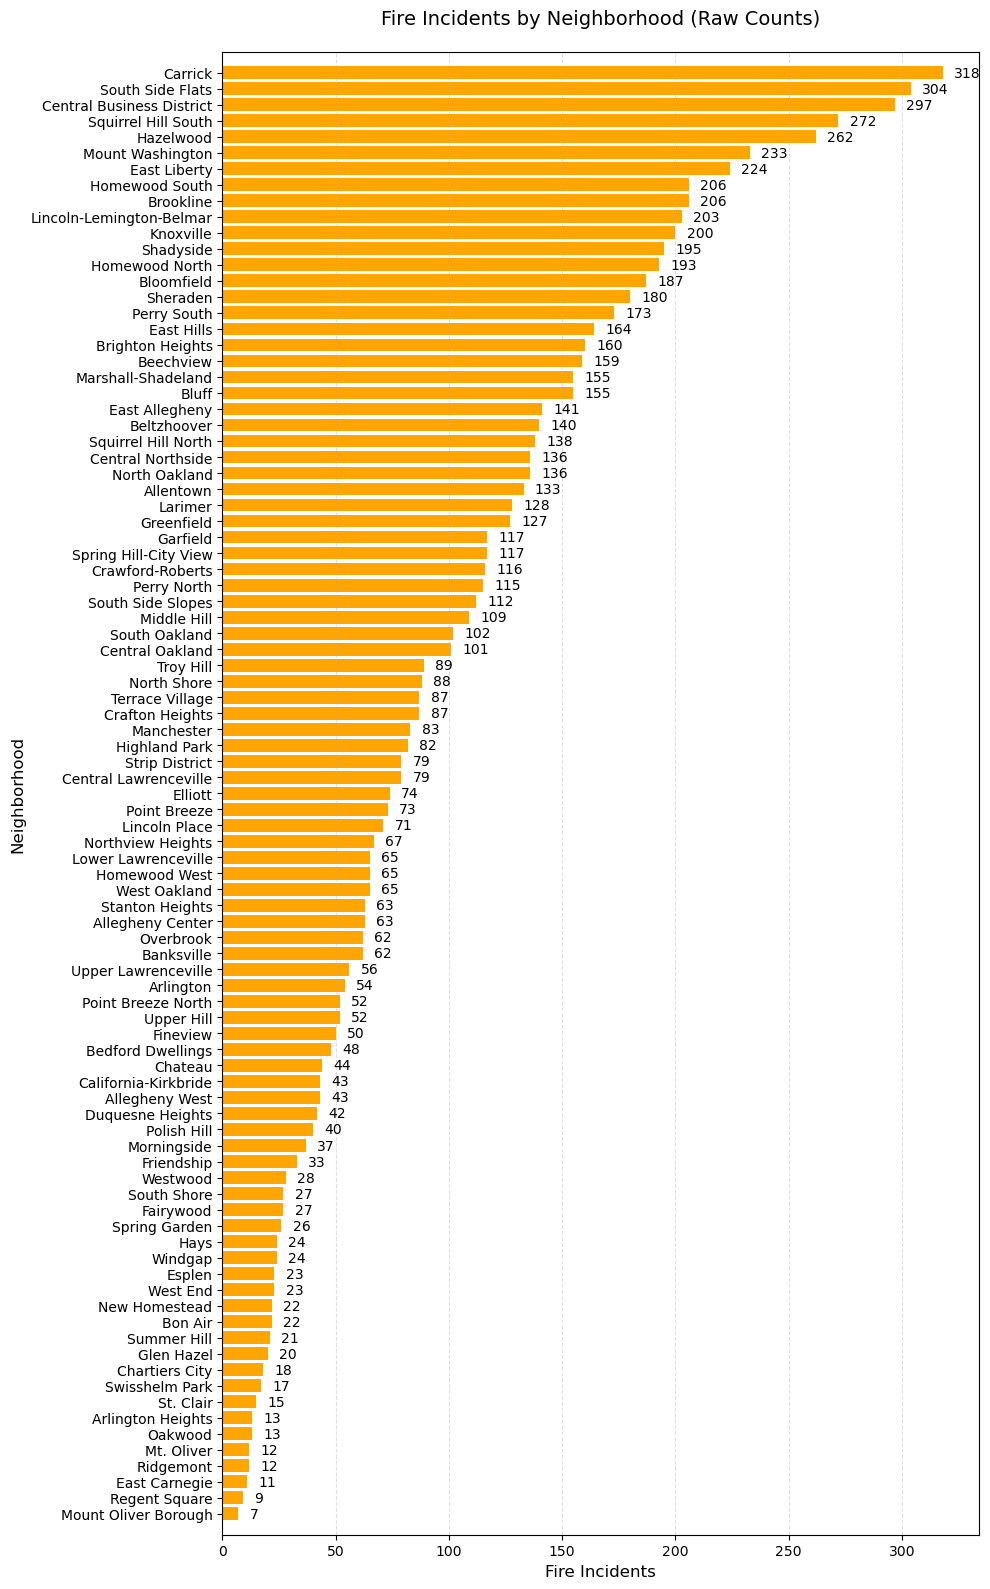

In [14]:
# Count fire incidents by neighborhood (ascending order)
fire_counts = fire['neighborhood'].value_counts().sort_values()

# Create horizontal bar plot
plt.figure(figsize=(10, 16))
bars = plt.barh(fire_counts.index, fire_counts.values, color='orange', height=0.8)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 5, bar.get_y() + bar.get_height()/2,
             f'{int(width):,}',
             va='center', ha='left', fontsize=10)

# Formatting
plt.title('Fire Incidents by Neighborhood (Raw Counts)', fontsize=14, pad=20)
plt.xlabel('Fire Incidents', fontsize=12)
plt.ylabel('Neighborhood', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.margins(y=0.01)
plt.tight_layout()
plt.show()

# Conclusion 

#### Analyzing fire incident data across Pittsburgh neighborhoods gives us helpful insight into how fire emergencies are spread out in the city. Some neighborhoods have more fire incidents than others, which could be due to different factors like the age of buildings, how many people live there, or how well safety rules are followed. These areas might need more attention from the city, such as better fire prevention programs, regular inspections, or faster emergency response systems. On the other hand, neighborhoods with fewer fire incidents may already have good safety habits in place or simply have fewer risks, like lower population density or newer buildings. Understanding these differences is important for making smart decisions about how to keep everyone safe. It helps city planners and emergency services focus their time and resources where they’re needed most. Overall, this data is useful for creating a safer and more prepared Pittsburgh.